In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. DATA LOADING

In [2]:
data = pd.read_csv('/content/hardwareStore.csv', encoding='latin-1')
data.head()

,ï»¿CATEGORY_ID,CATEGORY_NAME,PRODUCT_ID,PRODUCT_NAME,DESCRIPTION,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,DESCRIPTION - Detail 3,DESCRIPTION - Detail 4,STANDARD_COST,...,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY,WAREHOUSE_NAME,ADDRESS,POSTAL_CODE,CITY,STATE,COUNTRY_NAME
0,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,11,8,50,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,12,9,36,Bombay,1298 Vileparle (E),490231,Bombay,Maharashtra,India
2,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,6,2,97,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
3,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,8,4,67,"Seattle, Washington",2004 Charade Rd,98199,Seattle,Washington,United States of America
4,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,13,6,30,Sydney,12-98 Victoria Street,2901,Sydney,New South Wales,Australia


# 2. INITIAL DATA ANALYSIS

In [3]:
stats = data.describe()
unique = data['CATEGORY_NAME'].value_counts()
stats.head()

,ï»¿CATEGORY_ID,PRODUCT_ID,STANDARD_COST,LIST_PRICE,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,3.203237,139.579137,765.520405,950.993327,2.469424,10.971223,5.548561,107.474820
std,1.637782,84.840057,794.252142,991.070482,0.499289,4.662225,2.416821,68.008413
min,1.000000,2.000000,12.630000,15.550000,2.000000,5.000000,1.000000,0.000000
25%,2.000000,71.750000,332.380000,435.222500,2.000000,8.000000,4.000000,50.000000


# 3.CATEGORY ANALYSIS

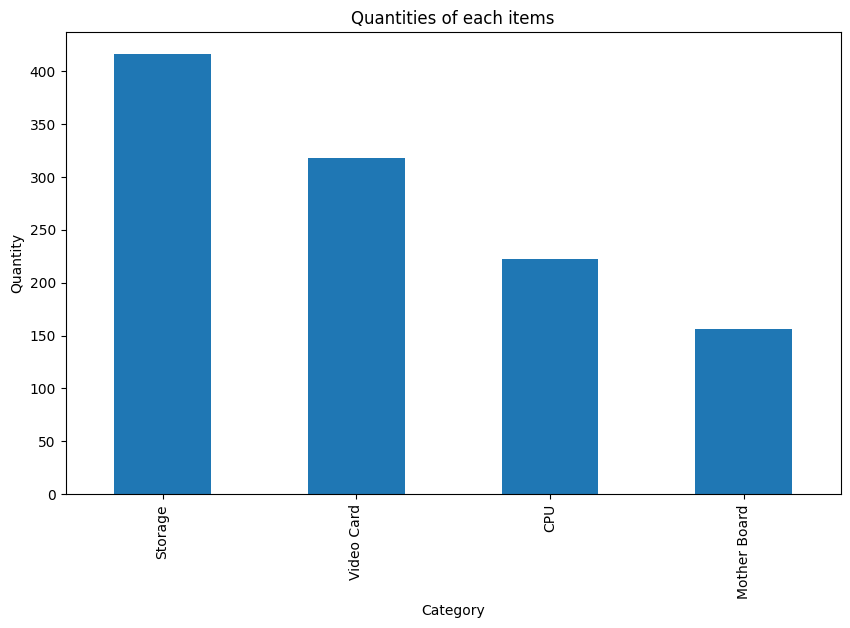

In [5]:
plt.figure(figsize=(10,6))
data['CATEGORY_NAME'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantities of each items')
plt.show()

highest_category = unique.idxmax()
highest_count = unique.idxmax()

# 4. COST AND PRICE ANALYSIS

In [6]:
average_standard_cost = data['STANDARD_COST'].mean()
average_list_price = data['LIST_PRICE'].mean()

highest_standard_cost = data.loc[data['STANDARD_COST'].idxmax()]['PRODUCT_NAME']
highest_list_price = data.loc[data['LIST_PRICE'].idxmax()]['PRODUCT_NAME']

# 5. LOCATION ANALYSIS

In [7]:
city = data.groupby('CITY')['QUANTITY'].sum()
highest_quantity_state = city.idxmax()

# 6. INSIGHTS AND REPORTING

In [8]:
Report = """
Insights and Reporting

1. Basic Statistics
Mean of the Standard Cost: {:.2f}
Mean of the List Price: {:.2f}
Unique Category:
{}

2. Category Analysis
The Category with the Highest Product: {}

3. Cost & Price Analysis
Product with Highest Product Cost: {}
Product with Highest List Price: {}

4. Location Analysis:
Location With Highest Quantity Stock: {}

""".format(average_standard_cost ,average_list_price ,unique,highest_category ,highest_standard_cost ,highest_list_price, highest_quantity_state)

print(Report)



Insights and Reporting

1. Basic Statistics
Mean of the Standard Cost: 765.52
Mean of the List Price: 950.99
Unique Category:
CATEGORY_NAME
Storage         416
Video Card      318
CPU             222
Mother Board    156
Name: count, dtype: int64

2. Category Analysis
The Category with the Highest Product: Storage

3. Cost & Price Analysis
Product with Highest Product Cost: Intel SSDPECME040T401
Product with Highest List Price: Intel SSDPECME040T401

4. Location Analysis:
Location With Highest Quantity Stock: South San Francisco


